**SIC**

In [4]:
from keras.layers import Input, LSTM, Bidirectional, Dense, Embedding,TimeDistributed,Conv1D,Dropout,MaxPooling1D,Dense
from keras.models import Model
from keras import layers
import tensorflow as tf
from keras.models import Model
from keras import layers
from keras.layers import  Lambda
import tensorflow as tf
import keras
from tensorflow.python.keras import backend as K
from keras.layers import Input, LSTM, Bidirectional, Dense, Embedding,TimeDistributed,Conv1D,Dropout,MaxPooling1D,Dense,Flatten,Activation,RepeatVector,Permute,Multiply


n_timesteps=200

input1= Input(shape=(n_timesteps,1),name='channel 1 input')
input2= Input(shape=(n_timesteps,1),name='channel 2 input')
input3= Input(shape=(n_timesteps,1),name='channel 3 input')
input4= Input(shape=(n_timesteps,1),name='channel 4 input')
conv1_1 = Conv1D(20, 11, activation='elu', padding='same', strides=1,name='conv1_1')(input1)
# pool1_1 = MaxPooling1D(4)(conv1_1)
pool1_1 = MaxPooling1D(2,name='pool1')(conv1_1)
conv1_2 = Conv1D(20, 11, activation='elu', padding='same', strides=1,name='conv1_2')(pool1_1)
drop1_1 = Dropout(0.5,name='dropout1')(conv1_2)


conv2_1 = Conv1D(20, 11, activation='elu', padding='same', strides=1,name='conv2_1')(input2)
# pool2_1 = MaxPooling1D(4)(conv2_1)
pool2_1 = MaxPooling1D(2,name='pool2')(conv2_1)
conv2_2 = Conv1D(20, 11, activation='elu', padding='same', strides=1,name='conv2_2')(pool2_1)
drop2_1 = Dropout(0.5,name='dropout2')(conv2_2)



conv3_1 = Conv1D(20, 11, activation='elu', padding='same', strides=1,name='conv3_1')(input3)
# pool3_1 = MaxPooling1D(4)(conv3_1)
pool3_1 = MaxPooling1D(2,name='pool3')(conv3_1)
conv3_2 = Conv1D(20, 11, activation='elu', padding='same', strides=1,name='conv3_2')(pool3_1)
drop3_1 = Dropout(0.5,name='dropout3')(conv3_2)


conv4_1 = Conv1D(20, 11, activation='elu', padding='same', strides=1,name='conv4_1')(input4)
# pool4_1 = MaxPooling1D(4)(conv4_1)
pool4_1 = MaxPooling1D(2,name='pool4')(conv4_1)
conv4_2 = Conv1D(20, 11, activation='elu', padding='same', strides=1,name='conv4_2')(pool4_1)
drop4_1 = Dropout(0.5,name='dropout4')(conv4_2)
concate=layers.concatenate([drop1_1,drop2_1,drop3_1,drop4_1],name='conclate_all')
conv_concate =Conv1D(20, 11, activation='elu', padding='same', strides=1,name='conv_all1')(concate)
# pool_concate = MaxPooling1D(4)(conv_concate)
pool_concate = MaxPooling1D(2,name='pool_all1')(conv_concate)
conv_concate1 =Conv1D(20, 11, activation='elu', padding='same', strides=1,name='conv_all2')(pool_concate)
drop_concate = Dropout(0.5,name='pool_all2')(conv_concate1)






# concate_last=layers.concatenate([drop_concate,drop5_2])
lstm1 = LSTM(32,activation="linear",return_sequences=True,name='LSTM1')(drop_concate)
lstm2 = LSTM(64,activation="linear",name='LSTM2')(lstm1)



# concate_last=layers.concatenate([lstm2,lstm_thetha])
output = Dense(1,activation="linear",name='dense')(lstm2 )



# #states = [state_h, state_c]
input=[input1,input2,input3,input4]




SIC_model= Model(input,output,name='SIC_model')
SIC_model.compile(loss = 'mean_squared_error',optimizer='adam')
SIC_model.compile(loss = 'mean_squared_error',optimizer='adam',metrics=['accuracy'])
SIC_model.summary()
SIC_model.save_weights('SIC_model.weights.h5')

Model: "SIC_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ channel 1 input     │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ channel 2 input     │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ channel 3 input     │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ channel 4 input     │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_1 (Conv1D)    │ (None, 200, 20)   │        240 │ channel 1         │
│                     │                   │            │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1 (Conv1D)    │ (None, 200, 20)   │        240 │ channel 2         │
│                     │                   │            │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3_1 (Conv1D)    │ (None, 200, 20)   │        240 │ channel 3         │
│                     │                   │            │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv4_1 (Conv1D)    │ (None, 200, 20)   │        240 │ channel 4         │
│                     │                   │            │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 100, 20)   │          0 │ conv1_1[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool2               │ (None, 100, 20)   │          0 │ conv2_1[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool3               │ (None, 100, 20)   │          0 │ conv3_1[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool4               │ (None, 100, 20)   │          0 │ conv4_1[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_2 (Conv1D)    │ (None, 100, 20)   │      4,420 │ pool1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_2 (Conv1D)    │ (None, 100, 20)   │      4,420 │ pool2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3_2 (Conv1D)    │ (None, 100, 20)   │      4,420 │ pool3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv4_2 (Conv1D)    │ (None, 100, 20)   │      4,420 │ pool4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1 (Dropout)  │ (None, 100, 20)   │          0 │ conv1_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2 (Dropout)  │ (None, 100, 20)   │          0 │ conv2_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout3 (Dropout)  │ (None, 100, 20)   │          0 │ conv3_2[0][0]   

 Total params: 72,361 (282.66 KB)

 Trainable params: 72,361 (282.66 KB)

 Non-trainable params: 0 (0.00 B)

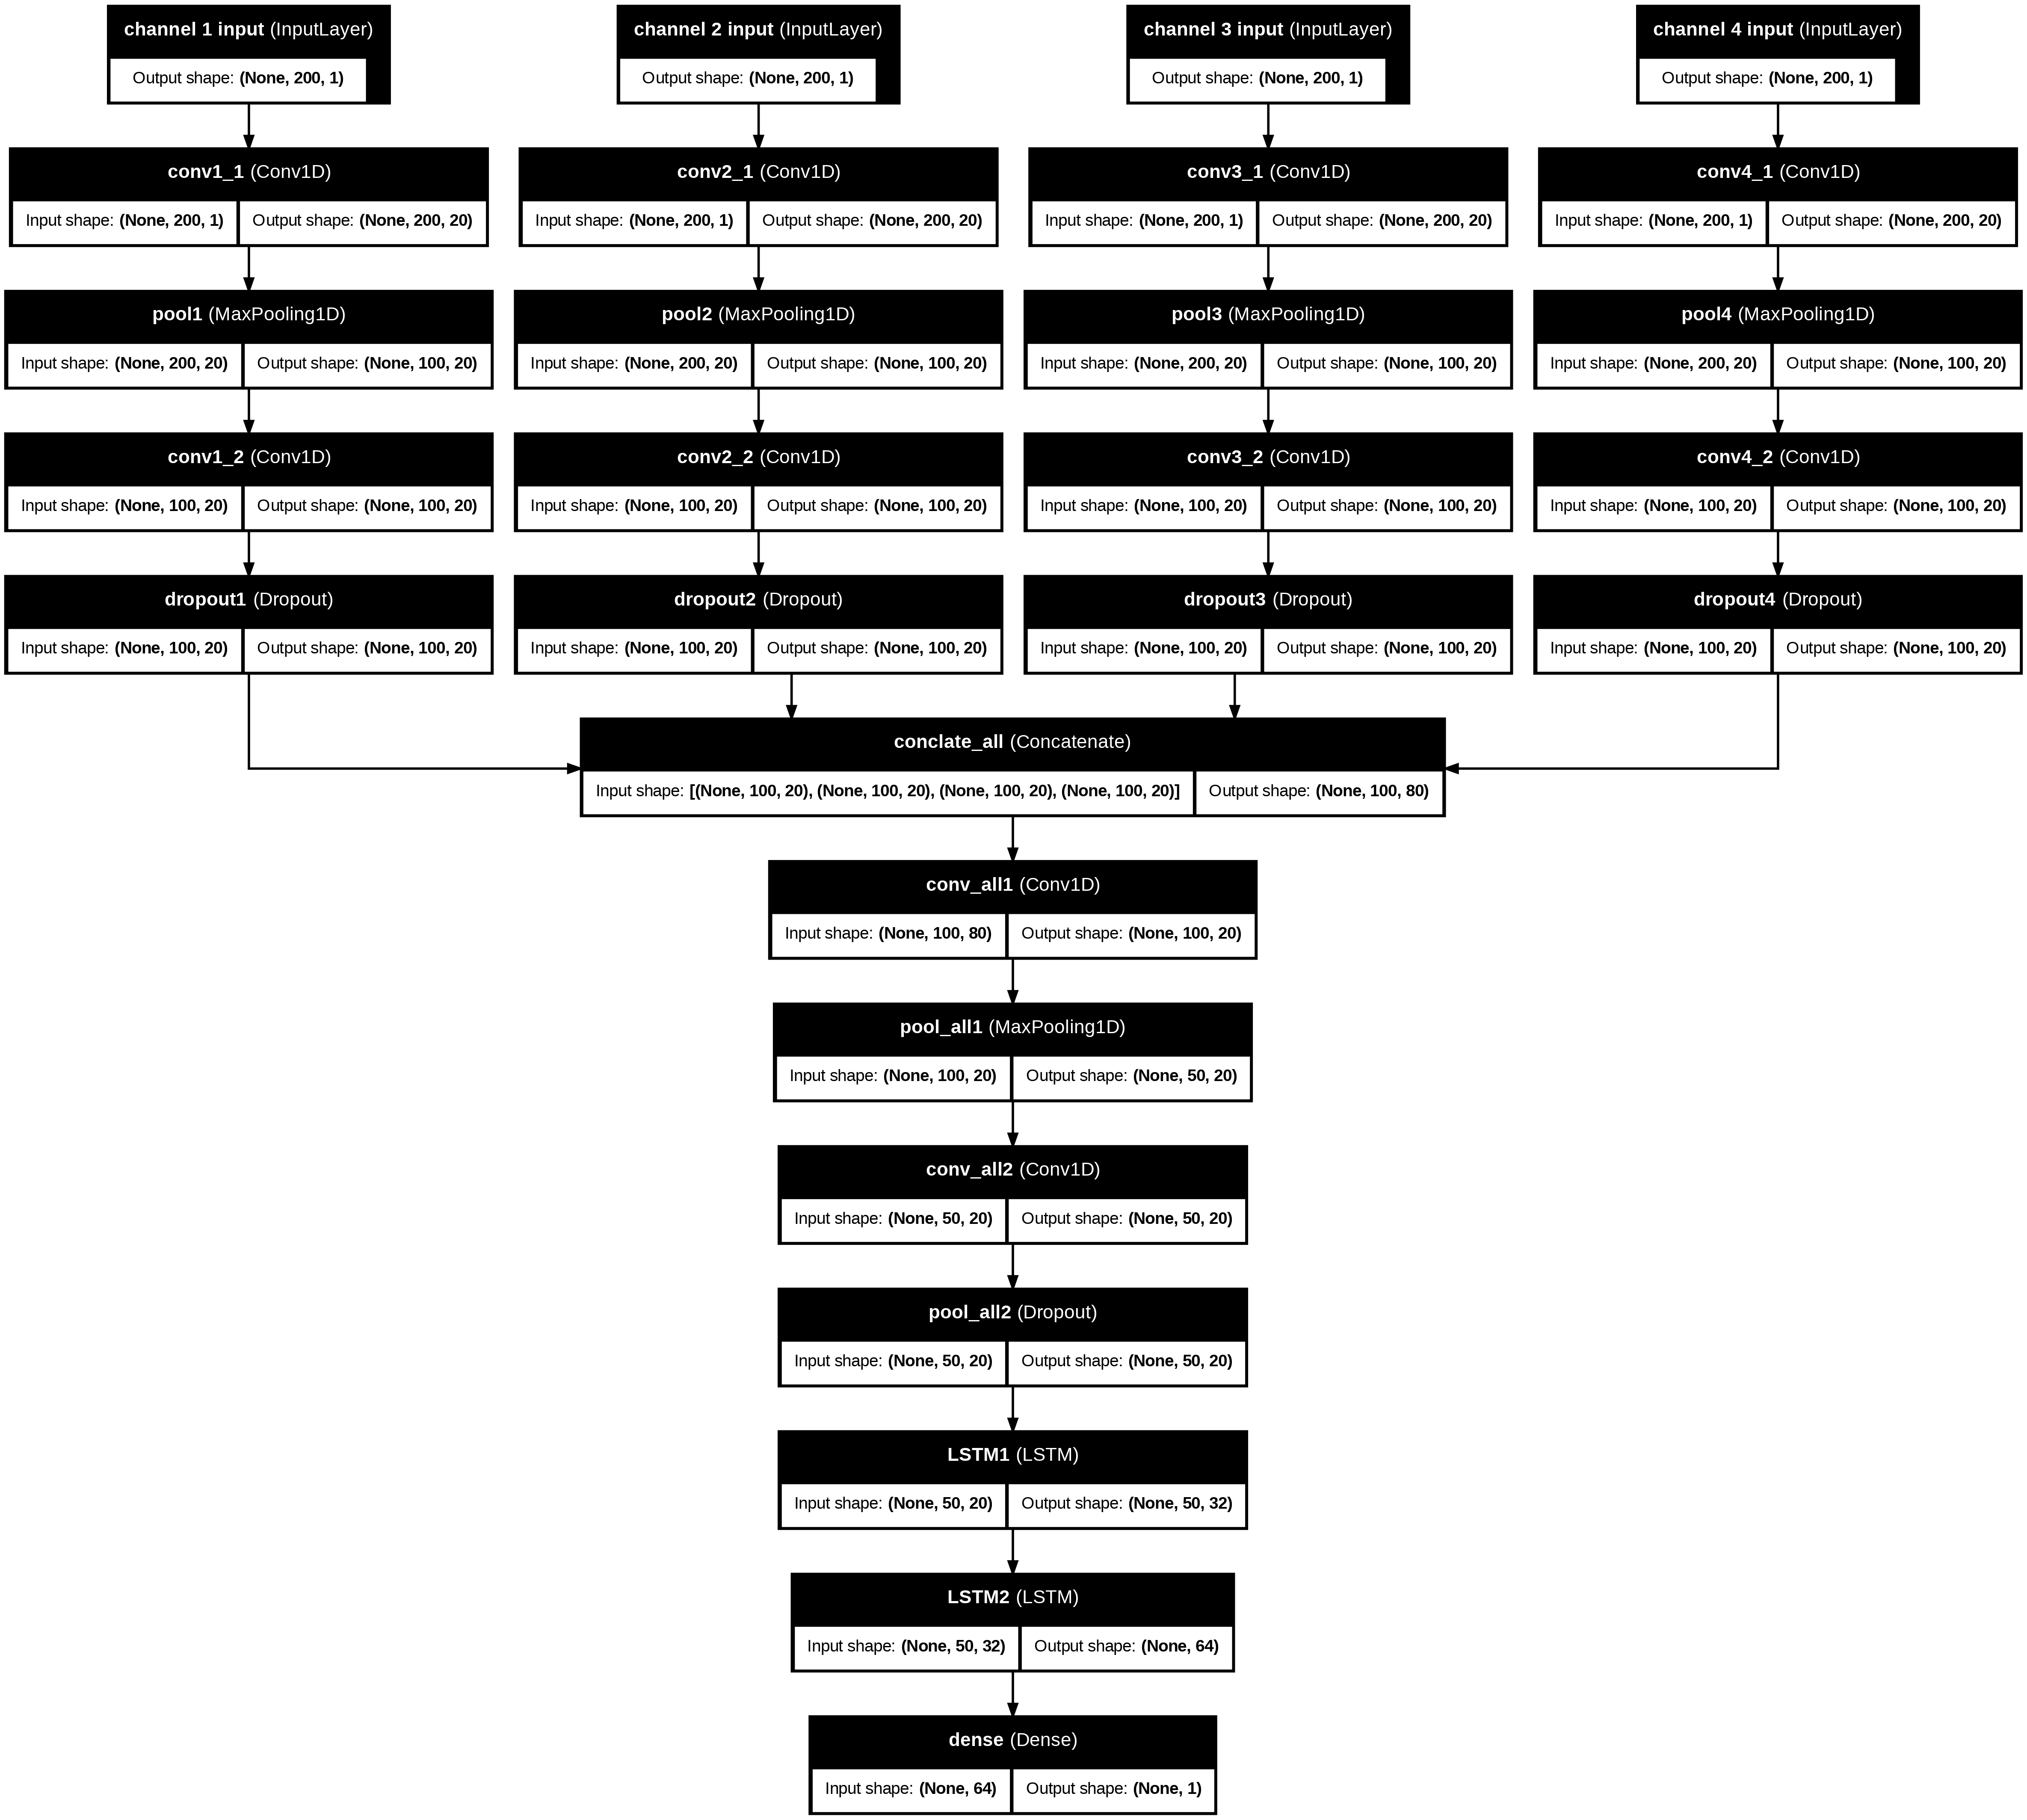

In [5]:
from keras.utils import plot_model
plot_model(SIC_model, to_file='model_with_forces.png', show_shapes=True, show_layer_names=True)

**DIC**

In [6]:
import tensorflow as tf


class Bahdanau(tf.keras.layers.Layer):
    def __init__(self, n):
        super(Bahdanau, self).__init__()
        self.w = tf.keras.layers.Dense(n)
        self.u = tf.keras.layers.Dense(n)
        self.v = tf.keras.layers.Dense(1)
    def call(self, stminus1, h):
        stminus1 = tf.expand_dims(stminus1, 1)
        e = self.v(tf.nn.tanh(self.w(stminus1) + self.u(h)))
        a = tf.nn.softmax(e, axis=1)
        c = a * h
        c = tf.reduce_sum(c, axis=1)
        return a,c



dropp=0.2
filter_num=20
filtersize=5
acct='elu'
n_timesteps=200
from keras.layers import Input, LSTM, Bidirectional, Dense, Embedding,TimeDistributed,Conv1D,Dropout,MaxPooling1D,Dense
from keras.models import Model
from keras import layers
import tensorflow as tf
from keras.models import Model
from keras import layers
from keras.layers import  Lambda
import tensorflow as tf
import keras
from tensorflow.python.keras import backend as K
from keras.layers import Input, LSTM, Bidirectional, Dense, Embedding,TimeDistributed,Conv1D,Dropout,MaxPooling1D,Dense,Flatten,Activation,RepeatVector,Permute,Multiply




input1= Input(shape=(n_timesteps,1))
input2= Input(shape=(n_timesteps,1))
input3= Input(shape=(n_timesteps,1))
input4= Input(shape=(n_timesteps,1))
input5= Input(shape=(n_timesteps,1))####theta



f5=tf.keras.layers.Reshape(( 50,4))(input5)
lstm_thetha= LSTM(32,activation="linear",return_sequences=True,name='Lth1')(f5)
print(lstm_thetha.shape)



conv1_1 = Conv1D(20, 11, activation='elu', padding='same', strides=1)(input1)
# pool1_1 = MaxPooling1D(4)(conv1_1)
pool1_1 = MaxPooling1D(2)(conv1_1)
conv1_2 = Conv1D(20, 11, activation='elu', padding='same', strides=1)(pool1_1)
drop1_1 = Dropout(0.5)(conv1_2)


conv2_1 = Conv1D(20, 11, activation='elu', padding='same', strides=1)(input2)
# pool2_1 = MaxPooling1D(4)(conv2_1)
pool2_1 = MaxPooling1D(2)(conv2_1)
conv2_2 = Conv1D(20, 11, activation='elu', padding='same', strides=1)(pool2_1)
drop2_1 = Dropout(0.5)(conv2_2)



conv3_1 = Conv1D(20, 11, activation='elu', padding='same', strides=1)(input3)
# pool3_1 = MaxPooling1D(4)(conv3_1)
pool3_1 = MaxPooling1D(2)(conv3_1)
conv3_2 = Conv1D(20, 11, activation='elu', padding='same', strides=1)(pool3_1)
drop3_1 = Dropout(0.5)(conv3_2)


conv4_1 = Conv1D(20, 11, activation='elu', padding='same', strides=1)(input4)
# pool4_1 = MaxPooling1D(4)(conv4_1)
pool4_1 = MaxPooling1D(2)(conv4_1)
conv4_2 = Conv1D(20, 11, activation='elu', padding='same', strides=1)(pool4_1)
drop4_1 = Dropout(0.5)(conv4_2)

concate=layers.concatenate([drop1_1,drop2_1,drop3_1,drop4_1])
conv_concate =Conv1D(20, 11, activation='elu', padding='same', strides=1)(concate)
# pool_concate = MaxPooling1D(4)(conv_concate)
pool_concate = MaxPooling1D(2)(conv_concate)
conv_concate1 =Conv1D(20, 11, activation='elu', padding='same', strides=1)(pool_concate)
drop_concate = Dropout(0.5)(conv_concate1)

pool1_2 = MaxPooling1D(2)(drop1_1)
pool2_2 = MaxPooling1D(2)(drop2_1)
pool3_2 = MaxPooling1D(2)(drop3_1)
pool4_2 = MaxPooling1D(2)(drop4_1)

ch1 = Lambda(lambda x: tf.unstack(x, axis=1), name='ch1')(pool1_2)
ch2 = Lambda(lambda x: tf.unstack(x, axis=1), name='ch2')(pool2_2)
ch3 = Lambda(lambda x: tf.unstack(x, axis=1), name='ch3')(pool3_2)
ch4= Lambda(lambda x: tf.unstack(x, axis=1), name='ch4')(pool4_2)

attentionlayer = Bahdanau(10)

part_list = list()
part_list = Lambda(lambda x: tf.unstack(x, axis=1), name='unstack_parts')(lstm_thetha)


att_list = list()
G = list()
for i in range(50):
    G=[ch1[i],ch2[i],ch3[i],ch4[i]]
    W=Lambda(lambda x: tf.stack(x, axis=1))(G)
    reshaped_tensor = tf.keras.layers.Lambda(lambda x: tf.reshape(x, (-1, 4, 20)))(W)

    a, c = attentionlayer(part_list[-1], reshaped_tensor)
    att_list.append( c )
    G=[]


conc_att  = Lambda(lambda x: tf.stack(x, axis=1))(att_list)

print(conc_att.shape)



concate_lstm2=layers.concatenate([conc_att,drop_concate])
concate_lstm2.shape



lstm1 = LSTM(32,activation="linear",return_sequences=True,name='L1')(concate_lstm2)
lstm2 = LSTM(64,activation="linear",name='L2')(lstm1)



# concate_last=layers.concatenate([lstm2,lstm_thetha])
output = Dense(1,activation="linear")(lstm2 )



# #states = [state_h, state_c]
input=[input1,input2,input3,input4]


input1=[input1,input2,input3,input4,input5]

DIC_model= Model(input1,output,name='DIC_model')
DIC_model.compile(loss = 'mean_squared_error',optimizer='adam')
DIC_model.compile(loss = 'mean_squared_error',optimizer='adam',metrics=['accuracy'])
DIC_model.summary()
DIC_model.save_weights('DIC_model.weights.h5')






(None, 50, 32)
(None, 50, 20)


Model: "DIC_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 200, 20)   │        240 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 200, 20)   │        240 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 200, 20)   │        240 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 200, 20)   │        240 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 100, 20)   │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 100, 20)   │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 100, 20)   │          0 │ conv1d_4[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 100, 20)   │          0 │ conv1d_6[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 100, 20)   │      4,420 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 100, 20)   │      4,420 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 100, 20)   │      4,420 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 100, 20)   │      4,420 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 100, 20)   │          0 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 100, 20)   │          0 │ conv1d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 100, 20)   │          0 │ conv1d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 100, 20)   │          0 │ conv1d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 200, 1)    │          0 │ -               

 Total params: 80,208 (313.31 KB)

 Trainable params: 80,208 (313.31 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.utils import plot_model
plot_model(DIC_model, to_file='model_with_forces.png', show_shapes=True, show_layer_names=True)

**SIC+forces**

In [8]:
from keras.layers import Input, Conv1D, MaxPooling1D, Dropout, LSTM, Dense, concatenate
from keras.models import Model

n_timesteps = 200  # your input length

# Four EMG inputs
input1 = Input(shape=(n_timesteps, 1))  # EMG 1
input2 = Input(shape=(n_timesteps, 1))  # EMG 2
input3 = Input(shape=(n_timesteps, 1))  # EMG 3
input4 = Input(shape=(n_timesteps, 1))  # EMG 4

def conv_block(inp):
    x = Conv1D(20, 11, activation='elu', padding='same', strides=1)(inp)
    x = MaxPooling1D(2)(x)
    x = Conv1D(20, 11, activation='elu', padding='same', strides=1)(x)
    x = Dropout(0.5)(x)
    return x

# Apply CNN blocks to each input
drop1_1 = conv_block(input1)
drop2_1 = conv_block(input2)
drop3_1 = conv_block(input3)
drop4_1 = conv_block(input4)

# Concatenate all EMG features
concate_emg = concatenate([drop1_1, drop2_1, drop3_1, drop4_1])

# Further CNN after concatenation
conv_concate = Conv1D(20, 11, activation='elu', padding='same', strides=1)(concate_emg)
pool_concate = MaxPooling1D(2)(conv_concate)
conv_concate1 = Conv1D(20, 11, activation='elu', padding='same', strides=1)(pool_concate)
drop_concate = Dropout(0.5)(conv_concate1)

# LSTM path
lstm1_emg = LSTM(32, activation="linear", return_sequences=True, name='L1')(drop_concate)
lstm2_emg = LSTM(64, activation="linear", name='L2')(lstm1_emg)
# Two new inputs for force sensors
input_shank = Input(shape=(n_timesteps, 1), name='shank_input')
input_thigh = Input(shape=(n_timesteps, 1), name='thigh_input')

def small_conv_force(inp):
    x = Conv1D(10, 9, activation='relu', padding='same')(inp)
    x = MaxPooling1D(2)(x)
    x = Conv1D(10, 7, activation='relu', padding='same')(x)
    x = Dropout(0.3)(x)
    x = LSTM(16, return_sequences=False)(x)  # compress to single vector
    return x

# Apply to each force signal
shank_feat = small_conv_force(input_shank)
thigh_feat = small_conv_force(input_thigh)

# Concatenate shank and thigh
force_concat = concatenate([shank_feat, thigh_feat])  # Shape (32,)
# Merge EMG LSTM output (64) + force conv-LSTM output (32) → total: 96
full_concat = concatenate([lstm2_emg, force_concat])

# Final regression layer
output = Dense(1, activation='linear')(full_concat)

# Final model
model = Model(
    inputs=[input1, input2, input3, input4, input_shank, input_thigh],
    outputs=output,
    name='MYONet_with_Forces'
)

# Compile it
from tensorflow.keras.optimizers import Adam
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

# Summary
model.summary()


Model: "MYONet_with_Forces"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_6       │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_8       │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 200, 20)   │        240 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 200, 20)   │        240 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 200, 20)   │        240 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_16 (Conv1D)  │ (None, 200, 20)   │        240 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_9     │ (None, 100, 20)   │          0 │ conv1d_10[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_10    │ (None, 100, 20)   │          0 │ conv1d_12[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_11    │ (None, 100, 20)   │          0 │ conv1d_14[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_12    │ (None, 100, 20)   │          0 │ conv1d_16[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 100, 20)   │      4,420 │ max_pooling1d_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 100, 20)   │      4,420 │ max_pooling1d_10… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 100, 20)   │      4,420 │ max_pooling1d_11… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_17 (Conv1D)  │ (None, 100, 20)   │      4,420 │ max_pooling1d_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 100, 20)   │          0 │ conv1d_11[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 100, 20)   │          0 │ conv1d_13[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 100, 20)   │          0 │ conv1d_15[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 100, 20)   │          0 │ conv1d_17[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 100, 80)   │          0 │ dropout_5[0][0],

 Total params: 77,469 (302.61 KB)

 Trainable params: 77,469 (302.61 KB)

 Non-trainable params: 0 (0.00 B)

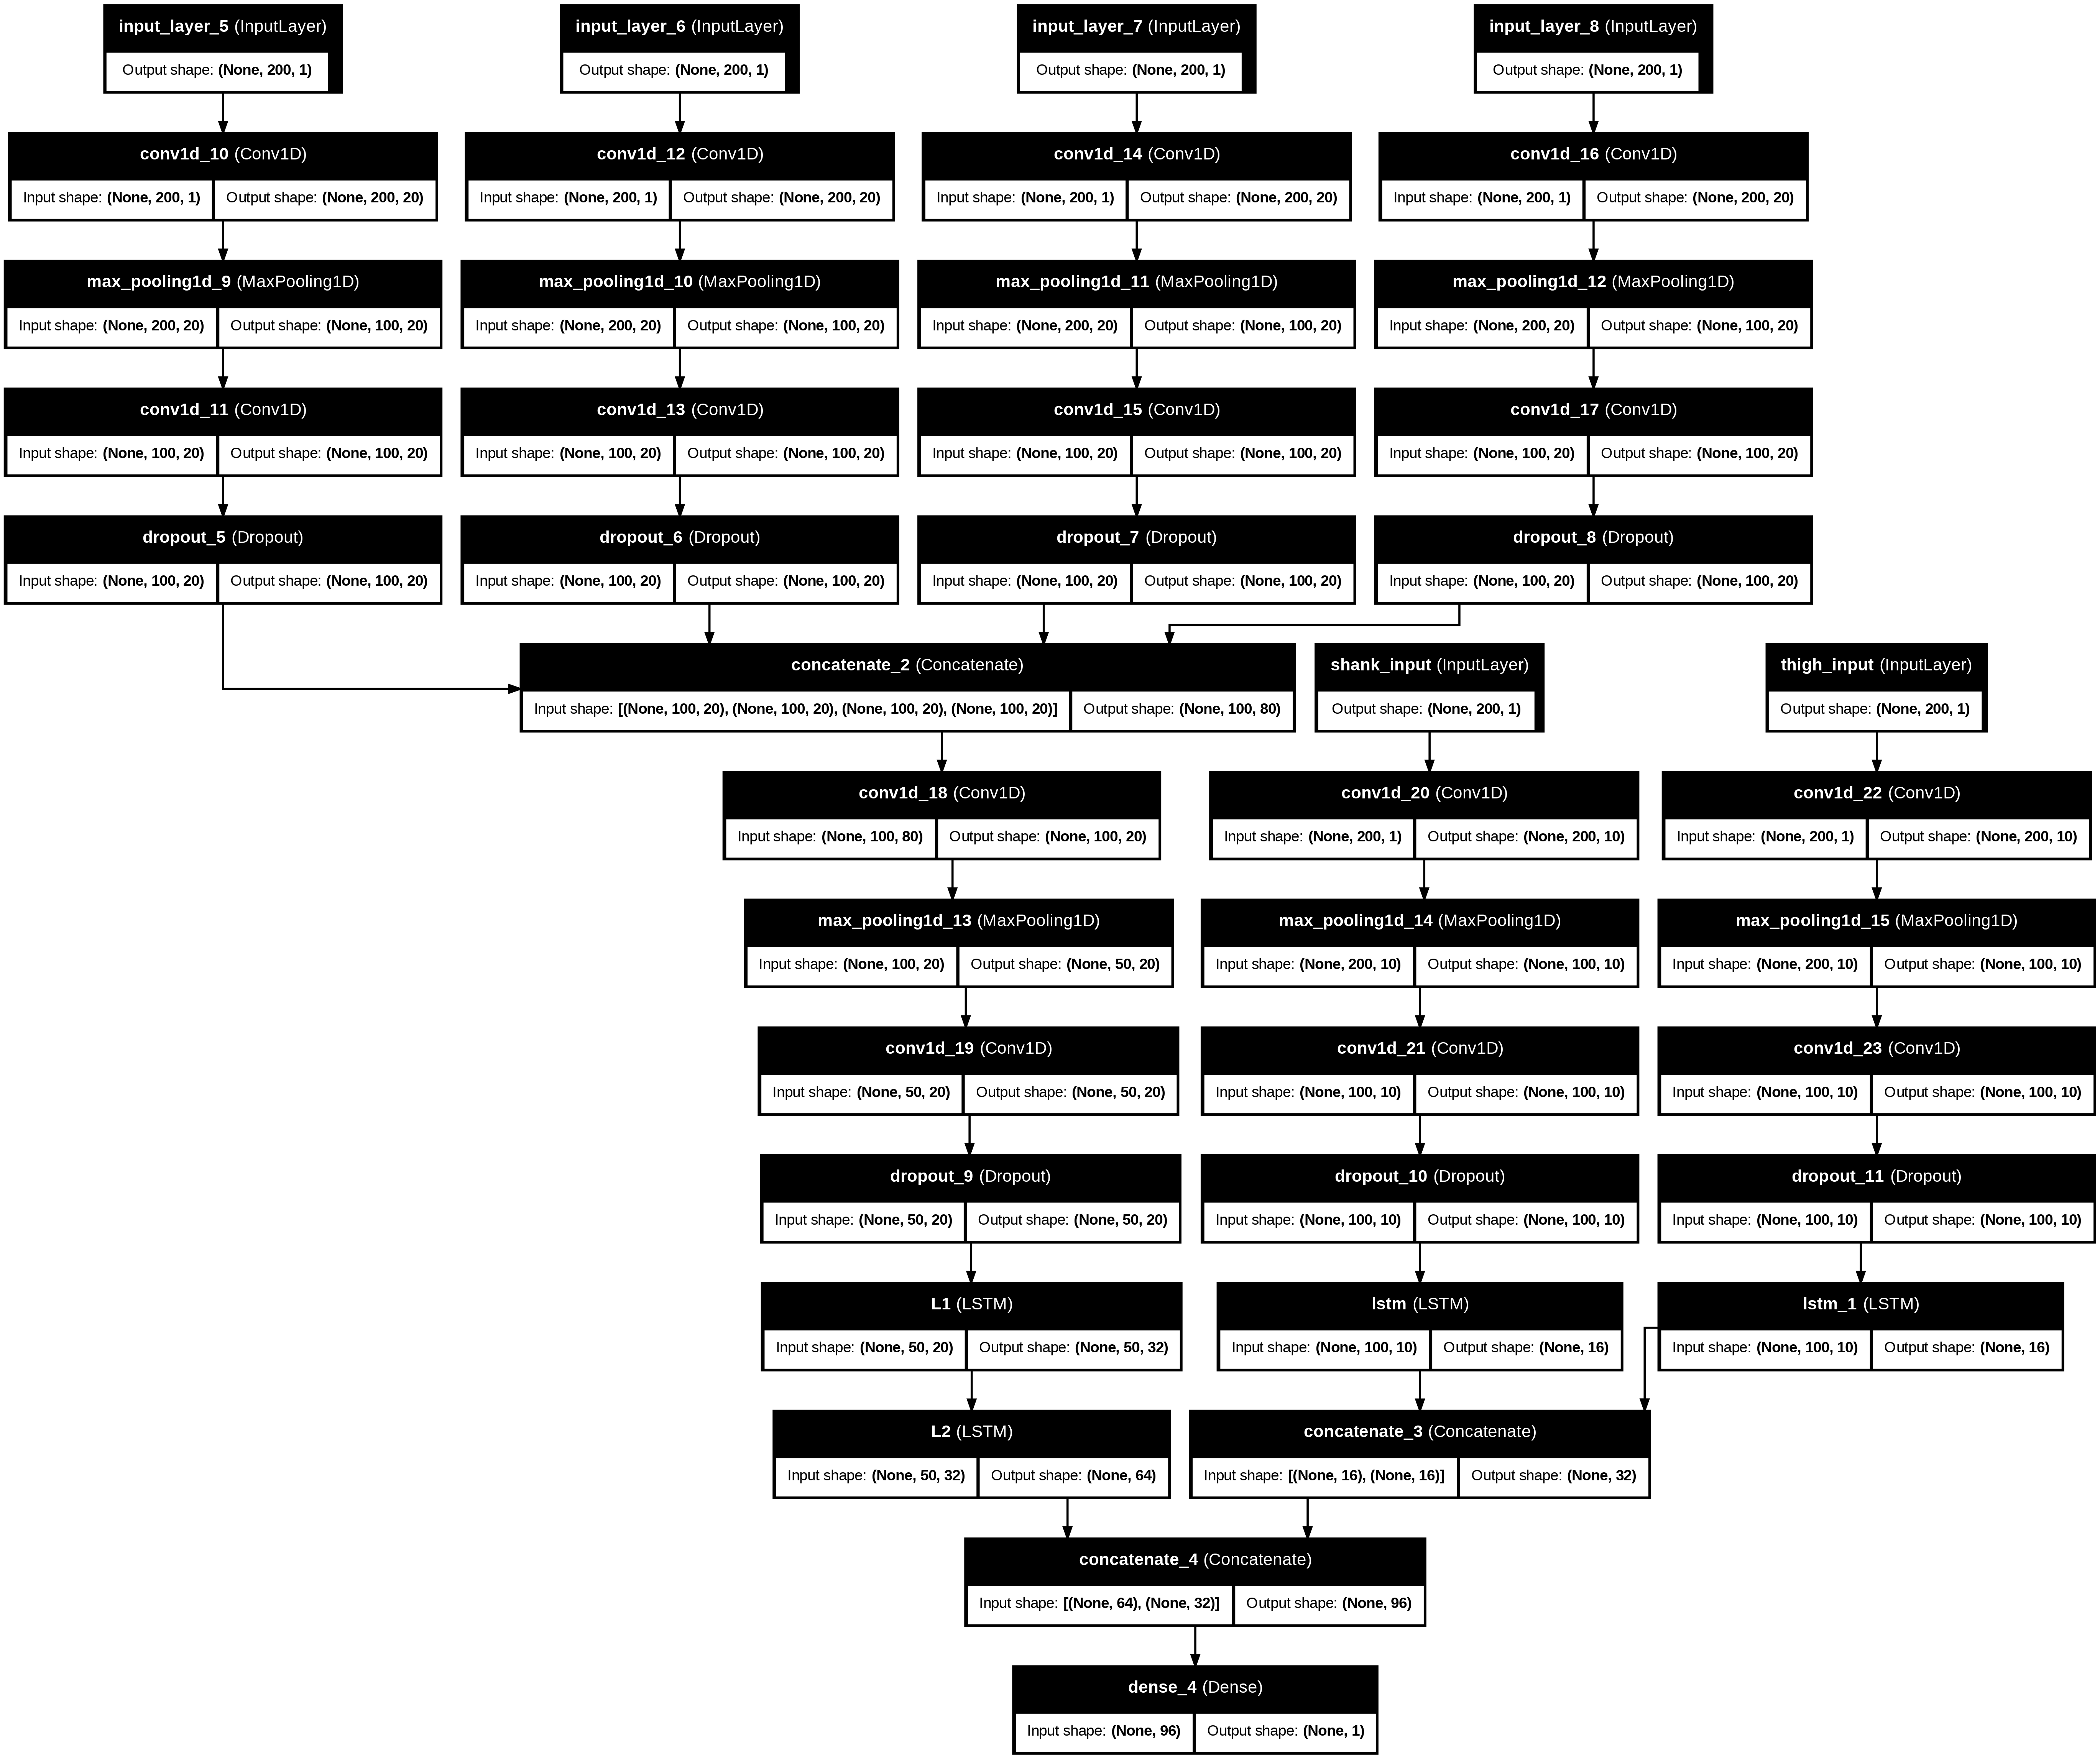

In [9]:
from keras.utils import plot_model

plot_model(model, to_file='model_with_forces.png', show_shapes=True, show_layer_names=True)


**DIC+Forces**

In [10]:
import tensorflow as tf
from keras.layers import Input, Conv1D, MaxPooling1D, Dropout, LSTM, Dense, concatenate, Lambda, Reshape
from keras.models import Model

# Hyperparams
n_timesteps = 200

# -----------------------------------
# Bahdanau Attention Layer
# -----------------------------------
class Bahdanau(tf.keras.layers.Layer):
    def __init__(self, n):
        super(Bahdanau, self).__init__()
        self.w = tf.keras.layers.Dense(n)
        self.u = tf.keras.layers.Dense(n)
        self.v = tf.keras.layers.Dense(1)

    def call(self, stminus1, h):
        stminus1 = tf.expand_dims(stminus1, 1)
        e = self.v(tf.nn.tanh(self.w(stminus1) + self.u(h)))
        a = tf.nn.softmax(e, axis=1)
        c = a * h
        c = tf.reduce_sum(c, axis=1)
        return a, c

# -----------------------------------
# EMG Channels (Conv + LSTM)
# -----------------------------------
def conv_block(inp):
    x = Conv1D(20, 11, activation='elu', padding='same', strides=1)(inp)
    x = MaxPooling1D(2)(x)
    x = Conv1D(20, 11, activation='elu', padding='same', strides=1)(x)
    x = Dropout(0.5)(x)
    return x

input1 = Input(shape=(n_timesteps, 1))  # EMG1
input2 = Input(shape=(n_timesteps, 1))  # EMG2
input3 = Input(shape=(n_timesteps, 1))  # EMG3
input4 = Input(shape=(n_timesteps, 1))  # EMG4

drop1_1 = conv_block(input1)
drop2_1 = conv_block(input2)
drop3_1 = conv_block(input3)
drop4_1 = conv_block(input4)

# EMG concat + deeper CNN
concate_emg = concatenate([drop1_1, drop2_1, drop3_1, drop4_1])
conv_concate = Conv1D(20, 11, activation='elu', padding='same', strides=1)(concate_emg)
pool_concate = MaxPooling1D(2)(conv_concate)
conv_concate1 = Conv1D(20, 11, activation='elu', padding='same', strides=1)(pool_concate)
drop_concate = Dropout(0.5)(conv_concate1)

# EMG LSTM path
lstm1_emg = LSTM(32, activation="linear", return_sequences=True, name='L1')(drop_concate)
lstm2_emg = LSTM(64, activation="linear", name='L2')(lstm1_emg)

# -----------------------------------
# Force Channels (Shank & Thigh)
# -----------------------------------
input_shank = Input(shape=(n_timesteps, 1), name='shank_input')
input_thigh = Input(shape=(n_timesteps, 1), name='thigh_input')

def small_conv_force(inp):
    x = Conv1D(10, 9, activation='relu', padding='same')(inp)
    x = MaxPooling1D(2)(x)
    x = Conv1D(10, 7, activation='relu', padding='same')(x)
    x = Dropout(0.3)(x)
    x = LSTM(16, return_sequences=False)(x)
    return x

shank_feat = small_conv_force(input_shank)
thigh_feat = small_conv_force(input_thigh)

force_concat = concatenate([shank_feat, thigh_feat])  # (32,)

# -----------------------------------
# Theta Attention Branch
# -----------------------------------
input_theta = Input(shape=(n_timesteps, 1), name='theta_input')
reshape_theta = Reshape((50, 4))(input_theta)
theta_lstm = LSTM(32, activation='linear', return_sequences=True, name='Lth1')(reshape_theta)

# Prepare attention inputs: extract EMG branches again
def extract_channels(x):
    return tf.unstack(x, axis=1)

ch1 = Lambda(extract_channels, name='ch1')(drop1_1)
ch2 = Lambda(extract_channels, name='ch2')(drop2_1)
ch3 = Lambda(extract_channels, name='ch3')(drop3_1)
ch4 = Lambda(extract_channels, name='ch4')(drop4_1)

part_list = Lambda(lambda x: tf.unstack(x, axis=1))(theta_lstm)

attention = Bahdanau(10)
att_list = []

for i in range(50):
    features_i = Lambda(lambda tensors: tf.stack(tensors, axis=1))([ch1[i], ch2[i], ch3[i], ch4[i]])
    reshaped = Lambda(lambda x: tf.reshape(x, (-1, 4, 20)))(features_i)
    _, context = attention(part_list[-1], reshaped)
    att_list.append(context)

conc_att = Lambda(lambda x: tf.stack(x, axis=1))(att_list)

# -----------------------------------
# Merge all
# -----------------------------------
combined_emg = concatenate([conc_att, drop_concate])
lstm_final1 = LSTM(32, activation="linear", return_sequences=True, name='lstm_final1')(combined_emg)
lstm_final2 = LSTM(64, activation="linear", name='lstm_final2')(lstm_final1)

# Final fusion: EMG LSTM + force + attention
final_merge = concatenate([lstm_final2, force_concat])
output = Dense(50, activation='linear', name='output')(final_merge)

# -----------------------------------
# Final Model
# -----------------------------------
model = Model(
    inputs=[input1, input2, input3, input4, input_theta, input_shank, input_thigh],
    outputs=output,
    name='MYONet_with_ThetaAttention_and_Force'
)

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['mae'])
model.summary()


Model: "MYONet_with_ThetaAttention_and_Force"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_10      │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_11      │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_12      │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_24 (Conv1D)  │ (None, 200, 20)   │        240 │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_26 (Conv1D)  │ (None, 200, 20)   │        240 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_28 (Conv1D)  │ (None, 200, 20)   │        240 │ input_layer_11[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_30 (Conv1D)  │ (None, 200, 20)   │        240 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_16    │ (None, 100, 20)   │          0 │ conv1d_24[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_17    │ (None, 100, 20)   │          0 │ conv1d_26[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_18    │ (None, 100, 20)   │          0 │ conv1d_28[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_19    │ (None, 100, 20)   │          0 │ conv1d_30[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_25 (Conv1D)  │ (None, 100, 20)   │      4,420 │ max_pooling1d_16… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_27 (Conv1D)  │ (None, 100, 20)   │      4,420 │ max_pooling1d_17… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_29 (Conv1D)  │ (None, 100, 20)   │      4,420 │ max_pooling1d_18… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_31 (Conv1D)  │ (None, 100, 20)   │      4,420 │ max_pooling1d_19… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ theta_input         │ (None, 200, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 100, 20)   │          0 │ conv1d_25[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 100, 20)   │          0 │ conv1d_27[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 90,069 (351.83 KB)

 Trainable params: 90,069 (351.83 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from keras.utils import plot_model

plot_model(model, to_file='model_with_forces.png', show_shapes=True, show_layer_names=True)